<center><h1>ML assignment 1 </h1></center>
<right><h5>By 21BCM006</h5></right>
<right><h5>Aliasgar</h5></right>

In [1]:
import numpy as np
import pandas as pd
import re
import math
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('SPMQA_tools.csv')
df

,Roll Number,Tool1,Tool2,Tool3,Final Verdict,Unnamed: 5,Unnamed: 6
0,21BCM002,Jira,Wrike,Microsoft Projects,NaN,NaN,NaN
1,21BCM006,Proofhub,Asana,JIRA,Mosaic,NaN,NaN
2,21BCM007,Jira,Asana,ClickUp,NaN,NaN,trello
3,21BCM008,Chisel,Asana,Plaky,NaN,NaN,NaN
4,21BCM009,Jira,Airtable,ClickUp,NaN,NaN,NaN
...,...,...,...,...,...,...,...
62,21BCM075,Jira,Asana,Trello,Jira,NaN,NaN
63,21BCM076,Jira,Asana,Wrike,NaN,NaN,NaN
64,21BCM077,Asana,Monday.com,Wrike,NaN,NaN,NaN
65,21BCM078,Asana,Celoxis,Scoro,NaN,NaN,NaN


In [3]:
df.drop(['Final Verdict','Unnamed: 5','Unnamed: 6'],axis = 'columns',inplace = True)
df.dropna(inplace = True)
df.reset_index(inplace=True,drop=True)
df['tools'] = df['Tool1'] + ',' + df['Tool2'] + ',' + df['Tool3']

In [4]:
def clean(l1):
    for i in range(len(l1)):
        k = str(l1[i]).lower()
        k = re.sub('[^a-z0-9]','',k)
        k = re.sub('(notionai)','notion',k)
        l1[i] = k
    return l1

In [5]:
l1,l2,l3 = list(df['Tool1']),list(df['Tool2']),list(df['Tool3'])
l1.extend(l2)
l1.extend(l3)
l1 = clean(l1)

In [6]:
l2 = list(set(l1))
len(l2)

26

<h3>Data Cleaning Completed</h3>

<h1> Explanation of applied Logic Behind Natural Language Processing</h1>

<p>
  TF-IDF (Term Frequency-Inverse Document Frequency) is a <strong>text analysis</strong> technique that assigns importance to words based on their occurrence in a particular document. In the context of student assignments, this means that software tools that are <em>rarely mentioned</em> throughout the entire document will be given <span style="color: red; font-weight: bold;">higher priority</span> for that specific student. These software tools will be assigned a <span style="font-size: 20px;">greater value</span> in the TF-IDF calculation.
</p>


<p style="font-size: 18px; font-weight: bold;">
  Term Frequency (TF)
</p>
<p>
  Term Frequency (TF) is a measure of how often a term appears in a document. In the context of student assignments, it can be calculated as follows:
</p>
<blockquote>
  <p style="font-size: 18px;">
    TF = (Number of times a student has specified that software) / (Total Number of software listed by a student)
  </p>
</blockquote>
<p>
  For example, if a student has listed 3 different software tools, each of them would have a TF of <b>1/3</b>, indicating that each software is given equal weight in the document.
</p>
<p>
  Software not mentioned by the student would have a TF of <span style="font-weight: bold;">0</span>, as they are not listed in the document.
</p>
<p style="font-style: italic;color:red;">
  Therefore, we multiply <span style="font-weight: bold;">0.75</span> to the first choice and <span style="font-weight: bold;">0.25</span> for the rest. The first choice is the one on which they will be further working. Also, the term frequency value of <span style="font-weight: bold;">1/3</span> for each student is adjusted to fit our modified TF-IDF algorithm.
</p>


<p>
  Inverse Document Frequency (IDF) is a measure of how unique a term is across a corpus of documents. In the context of student software choices, it can be calculated as follows:
</p>
<blockquote>
  <p>
    IDF = log<sub>2</sub>( <span class="fraction"><sup>Total number of students</sup> / <sub>Number of students who have listed a particular software in their choices</sub>)</span> + 1
  </p>
</blockquote>
<p>
  The IDF value reflects the uniqueness of the software selected by a student. If a software choice is rare among the student body (e.g., if only a few students have selected it out of the total 26 tools), the IDF value will be higher, indicating that more effort was put into choosing that software.
</p>
<p>
  The addition of 1 at the end ensures that a software choice that everyone else has selected will have a minimum IDF value of 1 and won't be neglected entirely.
</p>


In [7]:
def calc_idf(df,l1):
    l2 = list(set(l1))
    k = pd.DataFrame()
    k.index = l2
    k['idf'] = 0
    n = len(df)
    for i in l1:
         k['idf'][i] = k['idf'][i]+1
    for i in k.index:
        k['idf'][i] = math.log(len(df)/k['idf'][i]) + 1
    return k

In [8]:
d = calc_idf(df,l1)

In [9]:
d

,idf
asana,1.405465
basecamp,3.243745
smartsheet,5.189655
plaky,5.189655
scoro,4.091042
proofhub,3.243745
notion,3.243745
jira,1.526093
zoho,3.110213
trello,2.145132


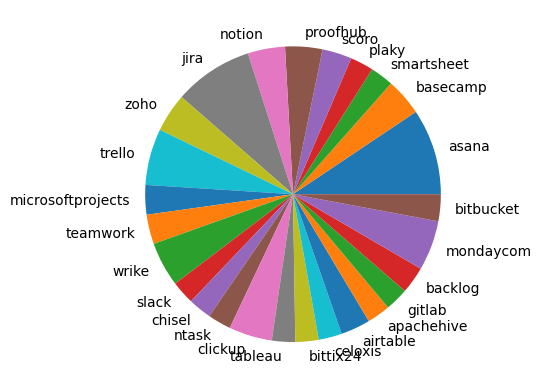

In [10]:
y = 100000/d['idf']
labels = y.index
plt.pie(y,labels = labels)
plt.show()

In [11]:
def Vectorize(d,df):
    l1,l2,l3 = clean(df['Tool1']),clean(df['Tool2']),clean(df['Tool3'])
    q = pd.DataFrame()
    q.index = d.index
    for i in range(len(l1)):
        q[df['Roll Number'][i]] = 0
        q[df['Roll Number'][i]][l1[i]],q[df['Roll Number'][i]][l2[i]],q[df['Roll Number'][i]][l3[i]] = 0.5*d['idf'][l1[i]],0.25*d['idf'][l2[i]],0.25*d['idf'][l3[i]]
    return q.T

In [12]:
t = Vectorize(d,df)
#t = np.array(t)
t

,asana,basecamp,smartsheet,plaky,scoro,proofhub,notion,jira,zoho,trello,...,clickup,tableau,bittix24,celoxis,airtable,apachehive,gitlab,backlog,mondaycom,bitbucket
21BCM002,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.763047,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM006,0.351366,0.0,0.0,0.000000,0.000000,1.621872,0.0,0.381523,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM007,0.351366,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.763047,0.0,0.000000,...,0.69794,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM008,0.351366,0.0,0.0,1.297414,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM009,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.763047,0.0,0.000000,...,0.69794,0.0,0.0,0.000000,1.022761,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21BCM075,0.351366,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.763047,0.0,0.536283,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM076,0.351366,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.763047,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
21BCM077,0.702733,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.604267,0.0
21BCM078,0.702733,0.0,0.0,0.000000,1.022761,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,1.297414,0.000000,0.0,0.0,0.0,0.000000,0.0


## NLP Task Over

### Machine Learning Starts

In [13]:
km = KMeans(n_clusters=3,init='k-means++').fit(t)

In [14]:
a = AgglomerativeClustering(10)
a.fit(t)

AgglomerativeClustering(n_clusters=10)

In [15]:
km.labels_

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0])

In [16]:
l = a.labels_

In [17]:
def get_groups(l,df):    
    k = pd.DataFrame()
    p = list(set(l))
    k.index = p
    df['groups'] = l
    k['Groups'] = 0
    k['len'] = 0
    for i in p:
        k['Groups'][i] =  df['Roll Number'][df['groups'] == i].values
        k['len'][i] = len(df['Roll Number'][df['groups'] == i].values)
    return k

In [18]:
p = get_groups(l,df)

In [19]:
p

,Groups,len
0,"[21BCM002, 21BCM010, 21BCM012, 21BCM013, 21BCM...",38
1,"[21BCM007, 21BCM009, 21BCM011, 21BCM038, 21BCM...",6
2,"[21BCM047, 21BCM058]",2
3,"[21BCM006, 21BCM017, 21BCM027, 21BCM028, 21BCM...",6
4,"[21BCM042, 21BCM055]",2
5,21BCM008,1
6,"[21BCM021, 21BCM031, 21BCM036, 21BCM040, 21BCM...",5
7,21BCM015,1
8,"[21BCM066, 21BCM072, 21BCM074]",3
9,"[21BCM018, 21BCM019]",2


In [20]:
df['tools'][df['Roll Number'] == '21BCM006']

1    Proofhub,Asana ,JIRA
Name: tools, dtype: object

In [21]:
df['tools'][df['Roll Number'] == '21BCM017']

12    Asana ,Ntask,ProofHub
Name: tools, dtype: object

In [22]:
df['tools'][df['Roll Number'] == '21BCM027']

20    Asana,Proofhub,Trello
Name: tools, dtype: object

### Finding best number of clustors

In [23]:
def plot_clustergraph(t,l):
    wcss = []
    for i in range(2,l):
        km = KMeans(n_clusters=i,init = 'k-means++').fit(t)
        wcss.append(km.inertia_)
    plt.plot(range(2,l),wcss)
    plt.xlabel('Clusters')
    plt.ylabel('WCSS(Within Clusters sum of square)(Cost function)')

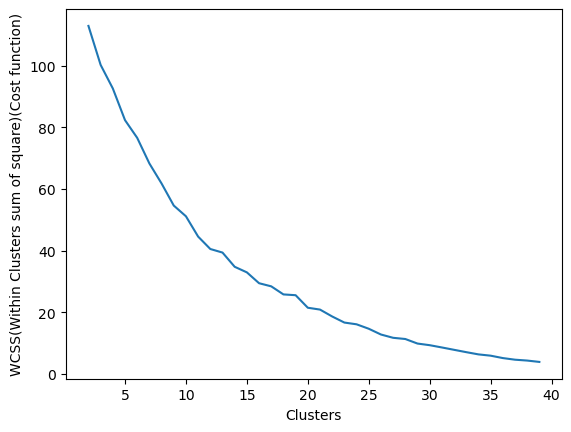

In [24]:
plot_clustergraph(t,40)

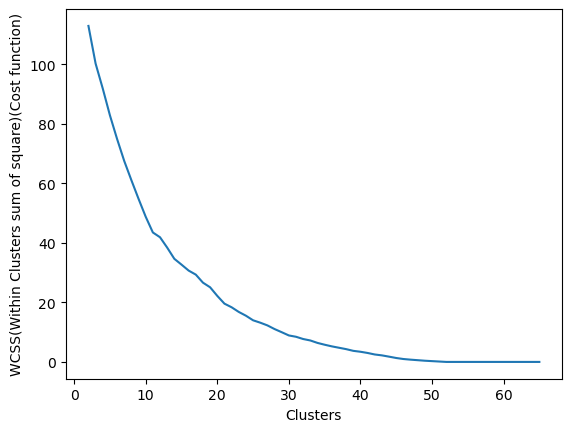

In [25]:
plot_clustergraph(t,66)

#### Elbow method didn't work therfore trying silhouette clustering evaluation

#### Getting smooth decreasing graph therefore can't determine number of cluster to be used using elbow method as there is no point where abrupt change can be seen

In [26]:
t1 = 'asana' 
t2 = 'Jira'
t3 = 'Wrike'
r = '21BCM032'
q = pd.DataFrame({'Roll Number':[r],'Tool1':[t1],'Tool2':[t2],'Tool3':[t3]})
t = Vectorize(d,q)
km.predict(t)

array([0])

In [27]:
df[df['groups']==1]

,Roll Number,Tool1,Tool2,Tool3,tools,groups
2,21BCM007,jira,asana,clickup,"Jira,Asana ,ClickUp",1
4,21BCM009,jira,airtable,clickup,"Jira,Airtable,ClickUp",1
6,21BCM011,jira,asana,clickup,"Jira,Asana,ClickUp",1
29,21BCM038,clickup,wrike,asana,"ClickUp,Wrike,Asana",1
54,21BCM068,clickup,bittix24,backlog,"clickup,bittix24,backlog",1
65,21BCM079,asana,jira,clickup,"Asana,Jira,Clickup",1


In [28]:
df

,Roll Number,Tool1,Tool2,Tool3,tools,groups
0,21BCM002,jira,wrike,microsoftprojects,"Jira,Wrike,Microsoft Projects",0
1,21BCM006,proofhub,asana,jira,"Proofhub,Asana ,JIRA",3
2,21BCM007,jira,asana,clickup,"Jira,Asana ,ClickUp",1
3,21BCM008,chisel,asana,plaky,"Chisel,Asana ,Plaky",5
4,21BCM009,jira,airtable,clickup,"Jira,Airtable,ClickUp",1
...,...,...,...,...,...,...
61,21BCM075,jira,asana,trello,"Jira,Asana,Trello",0
62,21BCM076,jira,asana,wrike,"Jira,Asana,Wrike",0
63,21BCM077,asana,mondaycom,wrike,"Asana,Monday.com,Wrike",0
64,21BCM078,asana,celoxis,scoro,"Asana,Celoxis,Scoro",0


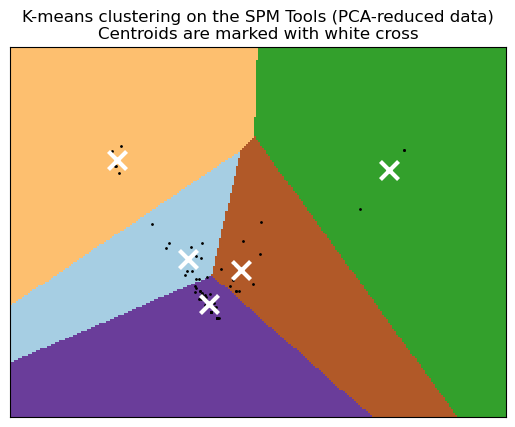

In [29]:
reduced_data = PCA(n_components=2).fit_transform(Vectorize(d,df))
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the SPM Tools (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



### code snippet from scikit learn library : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [30]:
dpc = pd.DataFrame({'feature1':reduced_data.T[0],'feature2':reduced_data.T[1]})
dpc['Roll Number'] = df['Roll Number']
dpc

,feature1,feature2,Roll Number
0,-0.118057,-0.071327,21BCM002
1,-0.155953,-0.201067,21BCM006
2,0.246092,-0.197611,21BCM007
3,-0.036022,-0.047274,21BCM008
4,0.413660,-0.119280,21BCM009
...,...,...,...
61,0.062284,-0.466470,21BCM075
62,-0.089207,-0.217532,21BCM076
63,-0.235609,0.013285,21BCM077
64,0.231758,0.078703,21BCM078


In [31]:
r = get_groups(kmeans.labels_,dpc)
r

,Groups,len
0,"[21BCM002, 21BCM008, 21BCM012, 21BCM015, 21BCM...",14
1,"[21BCM066, 21BCM072, 21BCM074]",3
2,"[21BCM021, 21BCM031, 21BCM036, 21BCM040, 21BCM...",5
3,"[21BCM006, 21BCM010, 21BCM013, 21BCM014, 21BCM...",33
4,"[21BCM007, 21BCM009, 21BCM011, 21BCM018, 21BCM...",11
